Video Game Analysis


Data Prepocessing

In [3]:
import numpy as np
import pandas as pd

videogame_sales_2024_df = pd.read_csv("vgchartz-2024.csv", sep=',', decimal='.')
videogame_sales_2024_df_cleaned = videogame_sales_2024_df.drop_duplicates()
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned.dropna(subset=['release_date', 'genre', 'jp_sales', 'pal_sales'])
videogame_sales_2024_df_cleaned["release_date"] = pd.to_datetime(videogame_sales_2024_df_cleaned["release_date"])
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[["title" ,"console", "genre", "total_sales", "na_sales", "jp_sales", "pal_sales", "release_date"]]
videogame_sales_2024_df_cleaned = videogame_sales_2024_df_cleaned[videogame_sales_2024_df_cleaned["release_date"] >= pd.to_datetime('2000-01-01')]

In [4]:
import numpy as np
import pandas as pd

video_games_sales_df = pd.read_csv("video_games_sales.csv", sep=',', decimal='.')
video_games_sales_df_cleaned = video_games_sales_df.drop_duplicates()
video_games_sales_df_cleaned = video_games_sales_df_cleaned.dropna(subset=['year', 'genre', 'jp_sales', 'eu_sales'])
video_games_sales_df_cleaned = video_games_sales_df_cleaned[["name" ,"platform", "genre", "na_sales", "jp_sales", "eu_sales", "year"]]
video_games_sales_df_cleaned = video_games_sales_df_cleaned[video_games_sales_df_cleaned["year"] > 2010]

In [ ]:
import numpy as np
import pandas as pd

def mean(val):
    numbers = val.split('-')                
    return (float(numbers[0].strip()) + float(numbers[1].strip())) / 2       

steam_games_beforemarch2025 = pd.read_csv("games_march2025_full.csv", sep=',', decimal='.')
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025.drop_duplicates()
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned.dropna(subset=['user_score', 'genres', 'estimated_owners'])
steam_games_beforemarch2025_cleaned = steam_games_beforemarch2025_cleaned[['user_score', 'genres', 'estimated_owners']]
steam_games_beforemarch2025_cleaned["estimated_owners"] = steam_games_beforemarch2025_cleaned["estimated_owners"].apply(mean)
print(steam_games_beforemarch2025_cleaned.head())

0    150000000.0
1     75000000.0
2    350000000.0
3     75000000.0
4        10000.0
Name: estimated_owners, dtype: float64


Graphs

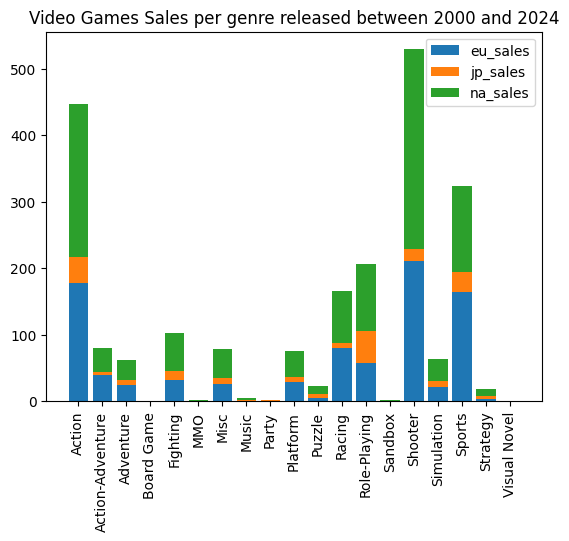

In [11]:
import matplotlib.pyplot as plt

salesPerGenre = videogame_sales_2024_df_cleaned[["genre", "jp_sales", "na_sales", "pal_sales"]]
salesPerGenre = salesPerGenre.groupby(["genre"]).sum().reset_index()
plt.bar(salesPerGenre["genre"], salesPerGenre["pal_sales"], label="eu_sales")
plt.bar(salesPerGenre["genre"], salesPerGenre["jp_sales"], bottom = salesPerGenre["pal_sales"], label="jp_sales")
plt.bar(salesPerGenre["genre"], salesPerGenre["na_sales"], bottom = salesPerGenre["pal_sales"] + salesPerGenre["jp_sales"], label="na_sales")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.title("Video Games Sales per genre released between 2000 and 2024")
plt.show()